# <en><center>Libraries</center></en>

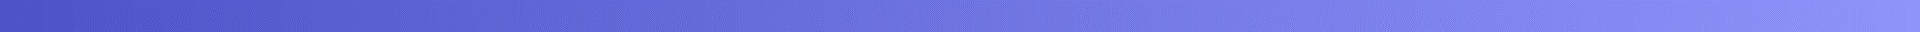

In [1]:
import numpy as np
import pandas as pd 

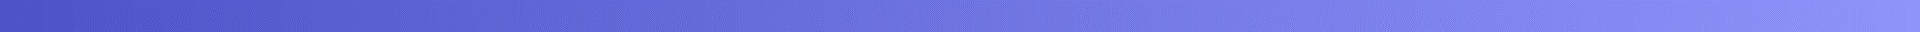

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    return df

In [3]:
df = wrangle("HRDataset_v14.csv")

In [4]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

#### Checking the columns

In [6]:
for col in df.columns:
    print(col)

Employee_Name
EmpID
MarriedID
MaritalStatusID
GenderID
EmpStatusID
DeptID
PerfScoreID
FromDiversityJobFairID
Salary
Termd
PositionID
Position
State
Zip
DOB
Sex
MaritalDesc
CitizenDesc
HispanicLatino
RaceDesc
DateofHire
DateofTermination
TermReason
EmploymentStatus
Department
ManagerName
ManagerID
RecruitmentSource
PerformanceScore
EngagementSurvey
EmpSatisfaction
SpecialProjectsCount
LastPerformanceReview_Date
DaysLateLast30
Absences


I will need a table for Employees, Managers, Job Position and Department

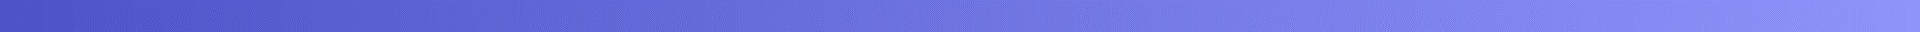

## Creating Employees Data Table

In [7]:
df1 = df.copy()

In [8]:
df1.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


#### Adjusting the Employee_name column

In [9]:
df1["Employee_Name"] = df1["Employee_Name"].str.replace("Alagbe,Trina", "Alagbe, Trina")

#### Creating columns for the Full Employee Name, First Name, Last Name and Middle Initials 

In [10]:
(
    df1["Employee_Name"].str.split(",", expand = True)
)

,0,1
0,Adinolfi,Wilson K
1,Ait Sidi,Karthikeyan
2,Akinkuolie,Sarah
3,Alagbe,Trina
4,Anderson,Carol
...,...,...
306,Woodson,Jason
307,Ybarra,Catherine
308,Zamora,Jennifer
309,Zhou,Julia


In [11]:
df1[["LastName","First_Name"]] = (
    df1["Employee_Name"].str.split(",", expand = True)
)

#### Removing trailing and leading whitespaces

In [13]:
df1["First_Name"] = df1["First_Name"].str.strip()

Checking the First_name Column for Names with Middle Initials or names with spaces.

In [14]:
for name in df1["First_Name"]:
    if " " in name:
        print(name)

Wilson  K
Francesco  A
Lowan  M
Claudia  N
Donovan  E
Denisa  S
Michael  J
Adrienne  J
Bradley  J
Brandon  R
Leigh Ann
Barbara  M
Courtney  E
Hang  T


In [1]:
17_732 * 30_821

546517972

In [15]:
df1["First_Name"] = df1["First_Name"].str.replace("Leigh Ann","Leigh-Ann")

#### Creating the Middle Initial Column

In [16]:
df1[["FirstName", "emptyspace","MiddleInitial"]] = (
    df1["First_Name"].str.split(" ", expand = True)
)

#### Filling None values in the Middle Initial Column with an empty string.

In [17]:
df1["MiddleInitial"].fillna("", inplace = True)

#### Creating the Full Name Column

In [18]:
df1["FullName"] = df1["FirstName"]+" "+df1["MiddleInitial"]+" "+df1["LastName"]

In [19]:
for name in df1["FullName"][:5]:
    print(name)

Wilson K Adinolfi
Karthikeyan  Ait Sidi
Sarah  Akinkuolie
Trina  Alagbe
Carol  Anderson


#### Removing the First_Name, emptyspaces and Employee_Name Columns

In [20]:
drop_columns = ["Employee_Name","First_Name","emptyspace"]

In [21]:
df1.drop(columns = drop_columns, inplace = True)

---

## Creating The Job Position Table

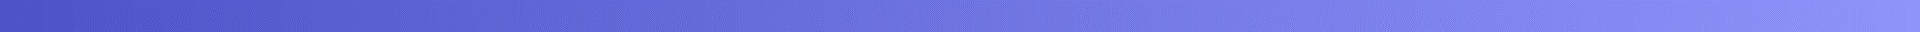

In [25]:
df1["PositionID"].value_counts().sort_index(ascending = True)

1       3
2       3
3      27
4       4
5       1
6       1
7       1
8       5
9       8
10      1
11      1
12      1
13      4
14      8
15      5
16      1
17      1
18     13
19    137
20     57
21      3
22      3
23      2
24      9
25      1
26      2
27      2
28      5
29      1
30      1
Name: PositionID, dtype: int64

#### Checking for null values

In [24]:
df1["PositionID"].isnull().sum()

0

#### Checking the Shared Services Manager position

In [26]:
df1[df1["PositionID"] == 23][["Position","FullName"]]

,Position,FullName
164,Shared Services Manager,Brandon R LeBlanc
227,Software Engineer,Sean Quinn


In [27]:
df1.at[227, "PositionID"] = 24

In [28]:
df1[["PositionID","Position"]].value_counts().sort_values()

PositionID  Position                    
30          Enterprise Architect              1
17          Production Manager                1
12          IT Director                       1
11          Director of Sales                 1
10          Director of Operations            1
9           Data Analyst                      1
13          IT Manager - Infra                1
7           Data Architect                    1
6           CIO                               1
25          Software Engineering Manager      1
5           BI Director                       1
29          Principal Data Architect          1
23          Shared Services Manager           1
13          IT Manager - Support              1
16          President & CEO                   1
26          Sr. Accountant                    2
27          Sr. DBA                           2
13          IT Manager - DB                   2
1           Accountant I                      3
21          Sales Manager                     3

In [28]:
df2 = df1[["PositionID","Position"]].copy()

In [29]:
df2["Position"] = df2["Position"].str.strip()

In [30]:
df2.drop_duplicates(keep = "first", inplace = True)

In [31]:
df2.reset_index(drop = True, inplace = True)

In [32]:
df2.drop(index = 18, axis = 0, inplace = True)

In [33]:
df2 = df2.sort_values("PositionID").reset_index(drop = True)

In [34]:
df2

,PositionID,Position
0,1,Accountant I
1,2,Administrative Assistant
2,3,Area Sales Manager
3,4,BI Developer
4,5,BI Director
5,6,CIO
6,7,Data Architect
7,8,Database Administrator
8,9,Data Analyst
9,10,Director of Operations


#### Reassigned the Production manager from PositionID 17 to PositionID 18

In [35]:
df1["PositionID"].replace(17,18, inplace = True)

In [36]:
df1[["Position","PositionID"]].value_counts().sort_values()

Position                      PositionID
IT Manager - Support          13              1
Enterprise Architect          30              1
President & CEO               16              1
Principal Data Architect      29              1
Director of Sales             11              1
Director of Operations        10              1
Data Architect                7               1
CIO                           6               1
Shared Services Manager       23              1
BI Director                   5               1
Software Engineering Manager  25              1
Data Analyst                  9               1
IT Manager - Infra            13              1
IT Director                   12              1
IT Manager - DB               13              2
Sr. Accountant                26              2
Sr. DBA                       27              2
Sales Manager                 21              3
Senior BI Developer           22              3
Administrative Assistant      2               3

Position 13 has 3 duplicates

In [37]:
df1[df1["PositionID"] == 13]["Position"]

76     IT Manager - Support
190      IT Manager - Infra
243         IT Manager - DB
244         IT Manager - DB
Name: Position, dtype: object

In [38]:
df1["Position"] = (
    df1["Position"]
    .str.replace("IT Manager - Support", "IT Manager")
    .str.replace("IT Manager - Infra", "IT Manager")
    .str.replace("IT Manager - DB", "IT Manager")
)

In [39]:
df2

,PositionID,Position
0,1,Accountant I
1,2,Administrative Assistant
2,3,Area Sales Manager
3,4,BI Developer
4,5,BI Director
5,6,CIO
6,7,Data Architect
7,8,Database Administrator
8,9,Data Analyst
9,10,Director of Operations


In [40]:
df2["Position"] = (
    df2["Position"]
    .str.replace("IT Manager - Support", "IT Manager")
    .str.replace("IT Manager - Infra", "IT Manager")
    .str.replace("IT Manager - DB", "IT Manager")
) 

In [41]:
df2.drop_duplicates(keep = "first", inplace = True)

#### Saving the Job Position Table

In [42]:
df2.to_csv("HR_Employee_Positions.csv", index = False)

---

## Creating the Managers Table

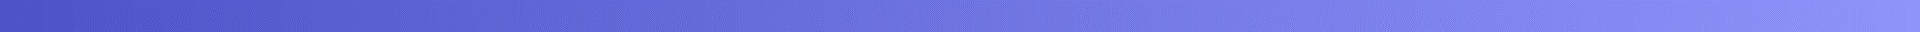

In [43]:
df1["ManagerName"].value_counts()

Michael Albert        22
Kissy Sullivan        22
Elijiah Gray          22
Kelley Spirea         22
Brannon Miller        22
Ketsia Liebig         21
David Stanley         21
Amy Dunn              21
Webster Butler        21
Janet King            19
Simon Roup            17
Peter Monroe          14
John Smith            14
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Brandon R. LeBlanc     7
Jennifer Zamora        7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
Name: ManagerName, dtype: int64

In [44]:
managers_df = df1[["ManagerName","ManagerID"]].copy()

In [45]:
managers_df.head()

,ManagerName,ManagerID
0,Michael Albert,22.0
1,Simon Roup,4.0
2,Kissy Sullivan,20.0
3,Elijiah Gray,16.0
4,Webster Butler,39.0


#### Checking for Null values

In [46]:
df1[["ManagerID", "ManagerName"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ManagerID    303 non-null    float64
 1   ManagerName  311 non-null    object 
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


In [47]:
df1[df1["ManagerID"].isnull()]["ManagerName"]

19     Webster Butler
30     Webster Butler
44     Webster Butler
88     Webster Butler
135    Webster Butler
177    Webster Butler
232    Webster Butler
251    Webster Butler
Name: ManagerName, dtype: object

#### Filling the missing values in the employees table

In [48]:
df1["ManagerID"].fillna(39, inplace = True)

In [49]:
df1[df1["ManagerID"] == 39][["ManagerID","ManagerName"]]

,ManagerID,ManagerName
4,39.0,Webster Butler
19,39.0,Webster Butler
30,39.0,Webster Butler
44,39.0,Webster Butler
65,39.0,Webster Butler
88,39.0,Webster Butler
89,39.0,Webster Butler
105,39.0,Webster Butler
124,39.0,Webster Butler
135,39.0,Webster Butler


#### Filling the missing manager ID in the managers table

In [50]:
managers_df["ManagerID"].fillna(39, inplace = True)
managers_df[managers_df["ManagerID"] == 39]

,ManagerName,ManagerID
4,Webster Butler,39.0
19,Webster Butler,39.0
30,Webster Butler,39.0
44,Webster Butler,39.0
65,Webster Butler,39.0
88,Webster Butler,39.0
89,Webster Butler,39.0
105,Webster Butler,39.0
124,Webster Butler,39.0
135,Webster Butler,39.0


In [51]:
df1[df1["ManagerID"] == 39]["FullName"]

4           Carol  Anderson
19            Scott  Becker
30         Joseph  Buccheri
44          Donovan E Chang
65           James  DeGweck
88          Nicole  Fancett
89          Susan  Ferguson
105            Alex  Gilles
124    Christie  Harrington
135         Rosalie  Hutter
151      Kathleen  Kinsella
174          Lindsay  Lynch
177       Robyn  Manchester
198          Colombui  Ndzi
206          Brooke  Oliver
214           Martin  Smith
232           Haley  Rivera
251          Nori  Sewkumar
276        Desiree  Tavares
280        Kenneth  Thibaud
300         Scott  Whittier
Name: FullName, dtype: object

In [52]:
df1["ManagerID"].value_counts().sort_index()

1.0      6
2.0     19
3.0      1
4.0     17
5.0      7
6.0      4
7.0     14
9.0      2
10.0     9
11.0    21
12.0    22
13.0     8
14.0    21
15.0     3
16.0    22
17.0    14
18.0    22
19.0    21
20.0    22
21.0    13
22.0    21
30.0     1
39.0    21
Name: ManagerID, dtype: int64

In [53]:
df1["ManagerID"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 311 entries, 0 to 310
Series name: ManagerID
Non-Null Count  Dtype  
--------------  -----  
311 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


In [54]:
managers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ManagerName  311 non-null    object 
 1   ManagerID    311 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


#### Dropping the dup

In [55]:
managers_df.drop_duplicates(keep = "first", inplace = True)
managers_df.sort_values(by = "ManagerID").reset_index(drop = True, inplace = True)

In [56]:
managers_df

,ManagerName,ManagerID
0,Michael Albert,22.0
1,Simon Roup,4.0
2,Kissy Sullivan,20.0
3,Elijiah Gray,16.0
4,Webster Butler,39.0
5,Amy Dunn,11.0
6,Alex Sweetwater,10.0
7,Ketsia Liebig,19.0
8,Brannon Miller,12.0
9,Peter Monroe,7.0


In [57]:
df1[df1["ManagerName"] == "Brandon R. LeBlanc"][["FullName", "EmpID","ManagerName","ManagerID"]]

,FullName,EmpID,ManagerName,ManagerID
26,Bonalyn Boutwell,10081,Brandon R. LeBlanc,3.0
29,Mia Brown,10238,Brandon R. LeBlanc,1.0
132,Estelle Howard,10182,Brandon R. LeBlanc,1.0
160,William LaRotonda,10038,Brandon R. LeBlanc,1.0
255,Nan Singh,10039,Brandon R. LeBlanc,1.0
259,Leigh-Ann Smith,10153,Brandon R. LeBlanc,1.0
268,Tyrone Steans,10147,Brandon R. LeBlanc,1.0


In [58]:
df1["ManagerID"].replace(3,1, inplace = True)

In [59]:
df1[df1["ManagerName"] == "Michael Albert"][["FullName", "EmpID","ManagerName","ManagerID"]]

,FullName,EmpID,ManagerName,ManagerID
0,Wilson K Adinolfi,10026,Michael Albert,22.0
14,Nader Barton,10066,Michael Albert,22.0
23,Dianna Blount,10294,Michael Albert,22.0
41,Beatrice Chace,10067,Michael Albert,22.0
58,Jean Crimmings,10132,Michael Albert,22.0
83,Angela Erilus,10299,Michael Albert,22.0
84,Miguel Estremera,10280,Michael Albert,22.0
102,Mildred Gentry,10159,Michael Albert,22.0
122,Joanne Handschiegl,10125,Michael Albert,22.0
129,Adrienne J Homberger,10195,Michael Albert,30.0


In [60]:
df1["ManagerID"].replace(30,22, inplace = True)

In [61]:
df1["ManagerID"].isnull().sum()

0

In [62]:
df1[df1["ManagerName"] == "Michael Albert"][["FullName", "EmpID","ManagerName","ManagerID"]]

,FullName,EmpID,ManagerName,ManagerID
0,Wilson K Adinolfi,10026,Michael Albert,22.0
14,Nader Barton,10066,Michael Albert,22.0
23,Dianna Blount,10294,Michael Albert,22.0
41,Beatrice Chace,10067,Michael Albert,22.0
58,Jean Crimmings,10132,Michael Albert,22.0
83,Angela Erilus,10299,Michael Albert,22.0
84,Miguel Estremera,10280,Michael Albert,22.0
102,Mildred Gentry,10159,Michael Albert,22.0
122,Joanne Handschiegl,10125,Michael Albert,22.0
129,Adrienne J Homberger,10195,Michael Albert,22.0


In [63]:
managers_df.drop(129, axis = 0, inplace = True)

In [64]:
managers_df.drop(26, axis = 0, inplace = True)

In [65]:
managers_df.sort_values(by = "ManagerID")

,ManagerName,ManagerID
29,Brandon R. LeBlanc,1.0
27,Janet King,2.0
1,Simon Roup,4.0
35,Jennifer Zamora,5.0
48,Eric Dougall,6.0
9,Peter Monroe,7.0
97,Board of Directors,9.0
6,Alex Sweetwater,10.0
5,Amy Dunn,11.0
8,Brannon Miller,12.0


In [66]:
df1.drop(columns = "ManagerName", inplace = True)

In [67]:
for col in df1.columns:
    print(col)

EmpID
MarriedID
MaritalStatusID
GenderID
EmpStatusID
DeptID
PerfScoreID
FromDiversityJobFairID
Salary
Termd
PositionID
Position
State
Zip
DOB
Sex
MaritalDesc
CitizenDesc
HispanicLatino
RaceDesc
DateofHire
DateofTermination
TermReason
EmploymentStatus
Department
ManagerID
RecruitmentSource
PerformanceScore
EngagementSurvey
EmpSatisfaction
SpecialProjectsCount
LastPerformanceReview_Date
DaysLateLast30
Absences
LastName
FirstName
MiddleInitial
FullName


In [68]:
df1["EmpStatusID"].value_counts()

1    184
5     88
3     14
4     14
2     11
Name: EmpStatusID, dtype: int64

In [69]:
df1["EmploymentStatus"].value_counts()

Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: EmploymentStatus, dtype: int64

In [70]:
drop_columns = ["MarriedID", "MaritalStatusID", "EmpStatusID"]
df1.drop(columns = drop_columns, inplace = True)

In [71]:
df1.columns

Index(['EmpID', 'GenderID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'LastName',
       'FirstName', 'MiddleInitial', 'FullName'],
      dtype='object')

In [72]:
df1[df1["Position"] == "IT Manager"][["FullName","PositionID"]]

,FullName,PositionID
76,Eric Dougall,13
190,Peter Monroe,13
243,Simon Roup,13
244,Ricardo Ruiz,13


In [74]:
managers_df.sort_values("ManagerID").reset_index(drop = True, inplace = True)

,ManagerName,ManagerID
13,Brandon R. LeBlanc,1.0
12,Janet King,2.0
1,Simon Roup,4.0
15,Jennifer Zamora,5.0
17,Eric Dougall,6.0
9,Peter Monroe,7.0
20,Board of Directors,9.0
6,Alex Sweetwater,10.0
5,Amy Dunn,11.0
8,Brannon Miller,12.0


#### Adding the new manager to the ManagerName Column

In [75]:
new_manager = pd.DataFrame({
    "ManagerName": "Ricardo Ruiz",
    "ManagerID": [3],
})

managers_df = managers_df.append(new_manager)

C:\Users\pyria\AppData\Local\Temp\ipykernel_17540\1217571460.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  managers_df = managers_df.append(new_manager)


In [76]:
managers_df.to_csv("HR_Managers.csv", index = False)

---

## Creating the Department Table

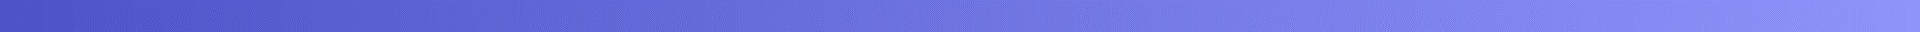

In [77]:
df1[["DeptID","Department"]].value_counts()

DeptID  Department          
5       Production              208
3       IT/IS                    50
6       Sales                    31
4       Software Engineering     10
1       Admin Offices             9
        Software Engineering      1
2       Executive Office          1
6       Production                1
dtype: int64

In [78]:
df1[df1["Department"] == "Software Engineering"][["FullName","DeptID","Department"]]

,FullName,DeptID,Department
6,Colby Andreola,4,Software Engineering
35,Max Cady,4,Software Engineering
37,Judith Carabbio,4,Software Engineering
66,Keyla Del Bosque,4,Software Engineering
86,Susan Exantus,4,Software Engineering
180,Sandra Martin,4,Software Engineering
212,Lucas Patronick,4,Software Engineering
227,Sean Quinn,1,Software Engineering
245,Adell Saada,4,Software Engineering
274,Andrew Szabo,4,Software Engineering


In [79]:
df1.at[227,"DeptID"] = 4

In [80]:
df1["Department"] = df1["Department"].str.strip()

In [81]:
df1[(df1["DeptID"] == 6)][["FullName","Department"]]

,FullName,Department
32,Jessica Bunbury,Sales
40,Michelle Carter,Sales
45,Anton Chigurh,Sales
60,Lynn Daneault,Sales
64,Randy Dee,Production
67,Alex Delarge,Sales
72,Jenna Dietrich,Sales
77,Elle Driver,Sales
95,Alex Forrest,Sales
98,Maruk Fraval,Sales


Updating the data entry to sales department

In [82]:
df1.at[64,"Department"] = "Sales"

In [83]:
department_df = df1[["DeptID", "Department"]].copy()

In [84]:
department_df.drop_duplicates(keep = "first", inplace = True)

In [85]:
department_df.sort_values("DeptID")

,DeptID,Department
26,1,Admin Offices
150,2,Executive Office
1,3,IT/IS
6,4,Software Engineering
0,5,Production
32,6,Sales


In [86]:
department_df.to_csv("HR_Departments.csv", index = False)

#### Create the performance score table

In [87]:
df1["PerfScoreID"].value_counts()

3    243
4     37
2     18
1     13
Name: PerfScoreID, dtype: int64

In [88]:
df1["PerformanceScore"].value_counts()

Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: PerformanceScore, dtype: int64

In [89]:
performance_df = df1[["PerfScoreID", "PerformanceScore"]].copy()

In [90]:
performance_df.drop_duplicates(keep = "first", inplace = True)

In [91]:
performance_df

,PerfScoreID,PerformanceScore
0,4,Exceeds
1,3,Fully Meets
23,2,Needs Improvement
64,1,Fully Meets
67,1,PIP
95,3,PIP


In [92]:
performance_df.drop(64, axis = 0, inplace = True)

In [93]:
performance_df.drop(95, axis = 0, inplace = True)

In [94]:
perf_df = performance_df.sort_values("PerfScoreID").reset_index(drop = True)

In [95]:
perf_df

,PerfScoreID,PerformanceScore
0,1,PIP
1,2,Needs Improvement
2,3,Fully Meets
3,4,Exceeds


In [96]:
perf_df.to_csv("Performance_score_table.csv", index = False)

In [92]:
for col in df1.columns:
    print(col)

EmpID
GenderID
DeptID
PerfScoreID
FromDiversityJobFairID
Salary
Termd
PositionID
Position
State
Zip
DOB
Sex
MaritalDesc
CitizenDesc
HispanicLatino
RaceDesc
DateofHire
DateofTermination
TermReason
EmploymentStatus
Department
ManagerID
RecruitmentSource
PerformanceScore
EngagementSurvey
EmpSatisfaction
SpecialProjectsCount
LastPerformanceReview_Date
DaysLateLast30
Absences
LastName
FirstName
MiddleInitial
FullName


In [109]:
drop_columns = ["Position", "PerformanceScore", "Department", "GenderID"]
df1.drop(columns = drop_columns, inplace = True)

In [111]:
df1.to_csv("Employees_Data_Table.csv", index = False)

---